 VISUALIZATION FOR AI AND ML Final Assignment

 Name: Harshvardhan Chauhan
 
 Student Id: C0780361

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
upload = files.upload()

Saving Bitcoin.csv to Bitcoin (6).csv


In [ ]:
df = pd.read_csv('Bitcoin.csv')
df_prophet = pd.read_csv('Bitcoin.csv')
df_prophet.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)
df_prophet['y'] = pd.to_numeric(df_prophet['y'].str.replace(",", ""), errors='coerce')

In [ ]:
df.head()

,Date,Price
0,12-Mar-20,"4,826.00"
1,13-Mar-20,"5,584.30"
2,14-Mar-20,"5,182.70"
3,15-Mar-20,"5,366.30"
4,16-Mar-20,"5,030.00"


Tried Facebook Prophet to predict Bitcoin Price

In [ ]:
from fbprophet import Prophet
prophet = Prophet()
prophet.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-03-12
1   2020-03-13
2   2020-03-14
3   2020-03-15
4   2020-03-16
..         ...
750 2022-04-01
751 2022-04-02
752 2022-04-03
753 2022-04-04
754 2022-04-05

[755 rows x 1 columns]


In [ ]:
forecast = prophet.predict(future)
forecast[["ds", "yhat"]].tail()

,ds,yhat
750,2022-04-01,187183.764044
751,2022-04-02,187546.894452
752,2022-04-03,187721.470677
753,2022-04-04,188096.288859
754,2022-04-05,188421.458671


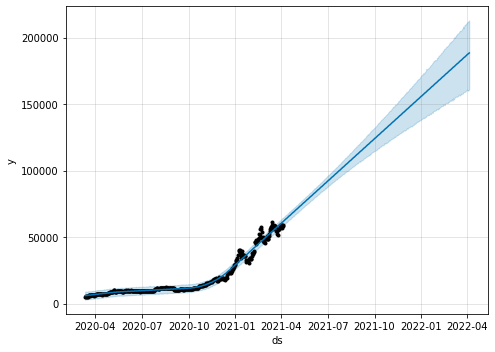

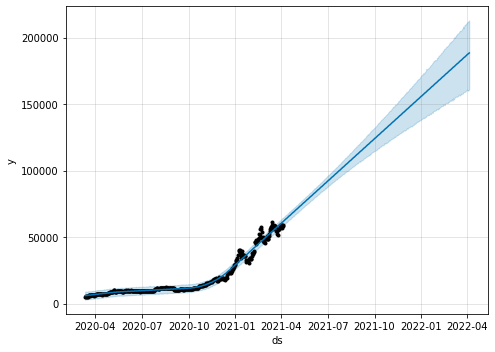

In [ ]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(7, 5))

In [ ]:
df.drop(['Date'],1,inplace=True)
df['Price'] = pd.to_numeric(df['Price'].str.replace(",", ""), errors='coerce')

In [ ]:
# A variable for predicting 'n' days out into the future
prediction_days = 14

# Create another column shifted 'n' units up
df['Prediction'] = df[['Price']].shift(-prediction_days)

In [ ]:
df

,Price,Prediction
0,4826.0,6725.1
1,5584.3,6373.4
2,5182.7,6233.7
3,5366.3,5890.4
4,5030.0,6391.0
...,...,...
385,58718.3,NaN
386,58977.3,NaN
387,57059.9,NaN
388,58199.9,NaN


Text(0, 0.5, 'Price')

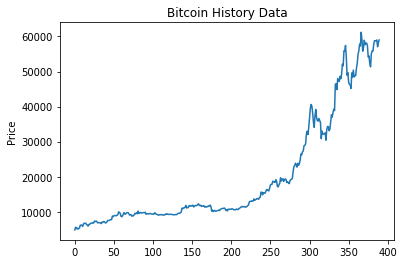

In [ ]:
df['Price'].plot()
plt.title('Bitcoin History Data')
plt.ylabel('Price')

In [ ]:
# Create the independent data set
# Convert the dataframe to numpy array and drop the prediction column
X = np.array(df.drop(['Prediction'], 1))

# Remove last n rows, where n rows is the prediction_days
X = X[:len(df)-prediction_days]

# print(X)

In [ ]:
# Create dependent data set
# Convert the data frame into a numpy array
y = np.array(df['Prediction'])

# Get all of the values except last n values
y = y[:-prediction_days]
print(y)

[ 6725.1  6373.4  6233.7  5890.4  6391.   6412.5  6638.5  6800.5  6735.9
  6857.4  6772.7  7332.3  7185.2  7361.2  7289.   6863.1  6867.8  6917.6
  6841.3  6850.9  6629.1  7085.6  7035.8  7230.8  7122.9  6833.5  6842.5
  7112.9  7488.5  7503.8  7540.4  7678.9  7766.   7746.9  8770.9  8629.
  8821.6  8966.3  8885.5  8874.7  9001.   9151.4  9979.8  9806.2  9554.6
  8738.8  8579.8  8813.8  9298.7  9778.4  9318.   9379.5  9677.7  9730.7
  9773.3  9512.3  9059.   9169.7  9177.   8728.2  8898.2  8842.5  9199.1
  9572.2  9424.8  9692.5  9454.8 10189.3  9527.6  9667.2  9794.4  9631.2
  9669.6  9742.6  9777.9  9768.8  9878.8  9283.2  9466.6  9471.3  9345.3
  9425.4  9523.5  9464.6  9388.1  9314.   9358.8  9296.4  9683.7  9624.6
  9302.   9247.5  9160.   9008.3  9124.   9185.4  9135.4  9229.9  9085.1
  9067.1  9134.4  9081.   9339.   9256.   9429.9  9235.7  9285.1  9233.3
  9300.8  9243.6  9253.4  9198.7  9135.3  9155.8  9170.2  9208.   9162.4
  9387.3  9513.7  9599.6  9546.4  9704.1  9932.5 110

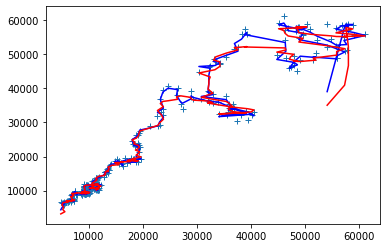

In [ ]:
def smooth(y, b):
  box = np.ones(b)/b
  y_smooth = np.convolve(y, box, mode= 'same')
  return y_smooth

plt.plot(X, y,'+')
plt.plot(X, smooth(y, 3), 'b')
plt.plot(X, smooth(y, 10), 'r-')

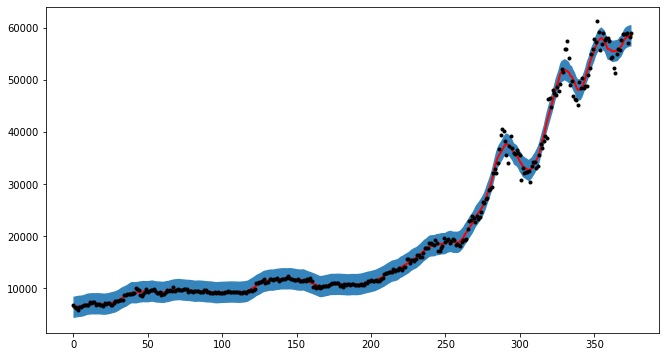

In [ ]:
# !pip install tsmoothie
from tsmoothie.smoother import *

# operate smoothing
smoother = ConvolutionSmoother(window_len=10, window_type='ones')
smoother.smooth(y)

# generate intervals
low, up = smoother.get_intervals('sigma_interval', n_sigma=2)

# plot the smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.plot(smoother.smooth_data[0], linewidth=2, color='red')
plt.plot(smoother.data[0], '.k')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.9);

In [ ]:
# Spliting the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# x_test = scaler.transform(x_test)

In [ ]:
# Set the prediction_days_array equal to the last n from the original dataset
prediction_days_array = np.array(df.drop(['Prediction'], 1))[-prediction_days:]
print(prediction_days_array)

[[54452.5]
 [52325.4]
 [51322.3]
 [55036.1]
 [55862.9]
 [55765.2]
 [57616.2]
 [58771.3]
 [58763.7]
 [58718.3]
 [58977.3]
 [57059.9]
 [58199.9]
 [58993.4]]


Text(0, 0.5, 'Price')

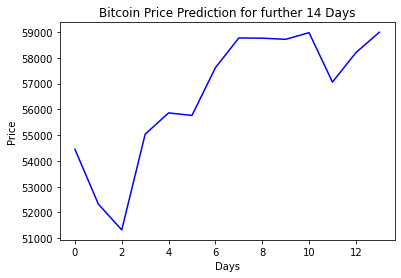

In [ ]:
plt.plot(prediction_days_array,color='blue')
plt.title("Bitcoin Price Prediction for further 14 Days")
plt.xlabel('Days')
plt.ylabel('Price')

Using SVM Model to Find the Accuracy

In [ ]:
from sklearn.svm import SVR

# Create and train the Support Vector Machine (Regression) using radial basis function
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.00001) #poly basis function
svr_rbf.fit(X_train, y_train)

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# Test the model
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.7673796349330945


In [ ]:
# Print the predict values
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)
print("\n")
print(y_test)

[43578.56247723  9301.36557393  9692.16967157 30202.35324561
  9659.27914674  9797.24120494 11420.35861347 33258.4979452
 25606.97006147 22972.91548084 23189.26958814 20117.90496104
 10934.81869662 19451.71892112 16680.43837174  9560.43310955
 32616.56906745 30243.6100948  38032.46686349 11468.75956082
  9719.57192284  9460.50080088  9640.96967163  9710.46478982
  9463.91821199 11859.53499288  9592.35655622 31395.90594203
 37864.91116214 11418.87692832  9641.53365901 22473.62359309
 30336.95047042 10577.89420017  9456.47142401 42281.27453635
  9622.73384949 35212.66681201 10983.39717488  9340.3531879
 32818.63425343 31347.35079461  9332.46471043 36994.57722005
 12718.17445792 21711.32309638 36143.54971628  9685.74033299
 22382.82808227 47758.18255678 34520.17226332 10771.08953998
 11470.43521957 37509.98831794  9455.20237552 10841.48002751
  9752.16800197  9459.85339283 24725.78835773 41918.24100033
 42654.01030109 11090.13714361 24206.44150997 11618.16991
  9821.61573386  9490.8328255

In [ ]:
# Print model predictions for next n days
svm_prediction = svr_rbf.predict(prediction_days_array)

print(svm_prediction)
# Print the actual price for Bitcoin for last n days
# print(df.tail(prediction_days))

[38652.37709901 46785.358798   39583.12030744 31334.95779383
 48927.64584195 46953.47901086 43363.50765607 34602.74436857
 34465.12509753 33795.47854112 39621.69988651 49260.64610502
 49083.7718949  39970.08095192]




Text(0, 0.5, 'Price')

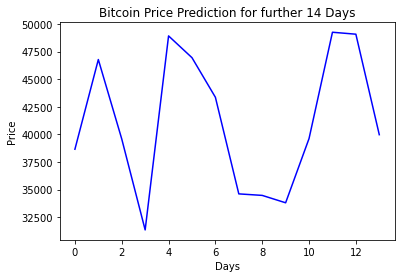

In [ ]:
plt.plot(svm_prediction,color='blue')
plt.title("Bitcoin Price Prediction for further 14 Days")
plt.xlabel('Days')
plt.ylabel('Price')

Using Kernel Ridge Regression 



In [ ]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(kernel="linear", alpha=1.0)
krr.fit(X_train, y_train)
y_pred = krr.predict(x_test)

# Test the model
krr_score = krr.score(x_test, y_test)
print("Kernel Ridge Regression Accuracy",krr_score)

Kernel Ridge Regression Accuracy 0.9244254970234304


In [ ]:
krr_prediction = krr.predict(prediction_days_array)

print(krr_prediction)

[59144.921875 56834.5      55745.078125 59778.765625 60676.890625
 60570.78125  62581.25     63835.90625  63827.640625 63778.265625
 64059.625    61976.984375 63215.28125  64077.25    ]


Text(0, 0.5, 'Price')

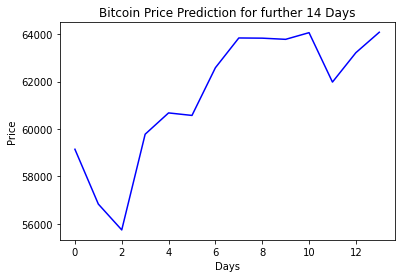

In [ ]:
plt.plot(krr_prediction,color='blue')
plt.title("Bitcoin Price Prediction for further 14 Days")
plt.xlabel('Days')
plt.ylabel('Price')

Using Gaussian Process Regression

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel).fit(X_train, y_train)
GPR_Results = gpr.score(x_test, y_test)
print("GPR Accuracy",GPR_Results)

GPR Accuracy 0.925741779093635


In [ ]:
gpr_prediction = gpr.predict(prediction_days_array)

print(gpr_prediction)

[58585.7215147  56323.71031475 55256.98875141 59206.33631134
 60085.57605934 59981.67944622 61950.07901859 63178.44116592
 63170.35914135 63122.07965279 63397.50671005 61358.49571705
 62570.80016327 63414.62785149]


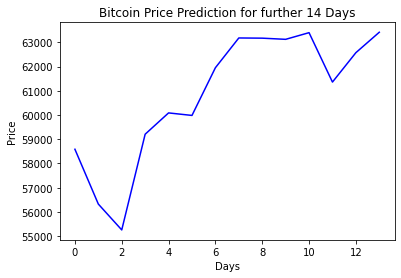

In [ ]:
plt.plot(gpr_prediction,color='blue')
plt.title("Bitcoin Price Prediction for further 14 Days")
plt.xlabel('Days')
plt.ylabel('Price')

Using KNN Regression to find the accuracy

In [ ]:
# !pip install mglearn
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
y_pred=reg.predict(X_test)
print(y_pred)

[-0.31560601  0.15952474  1.02677816 -1.69801095 -1.40261905 -1.77581224
  0.24824413  0.99712017 -0.10897279 -1.40261905]


Reference:


1.   https://randerson112358.medium.com/build-a-bitcoin-price-prediction-program-using-machine-learning-and-python-89f3dc6cb3b1

